In [1]:
# Import des librairies d'environnement
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("notebook")
sns.set_style("whitegrid")

In [2]:
# Import des librairies local
import sys
sys.path.append('../src')
from connect import JskDB, my_function

In [3]:
# chargement des données dans les dataframes

sql_connection = JskDB().create_connection()

df_snap_channels = pd.read_sql_table(table_name='snap_channels', con=sql_connection)
df_snap_behavior = pd.read_sql_table(table_name='snap_behavior', con=sql_connection)
df_snap_audience = pd.read_sql_table(table_name='snap_audience', con=sql_connection)
df_snap_stories = pd.read_sql_table(table_name='snap_stories', con=sql_connection)

sql_connection.close()

In [4]:
# 5109890280062976 beauty wow
# 5132076604719104 beauty hack
# Selection depuis la table snap_stories
filter_list = [5109890280062976, 5132076604719104]
df_snap_stories_beauty = df_snap_stories[df_snap_stories.channel_fbid.isin(filter_list)]

# Affichage des 5 premières lignes
df_snap_stories_beauty.head()

,channel_fbid,story,country,type,position,media_name,publication_date,expiration_date,nb_duration_hrs,topsnap_views,...,unique_viewers,unique_completers,completion_rate,topsnaps_unique_views,followers_added,shares_unique,shares,viewers_from_shares,screenshots,tags
43210,5109890280062976,Albert Einstein,AE,PUBLISHER_STORY,0,0,2018-09-21,2018-09-23,48.0,130917,...,17420,4020,0.0000,119578,158,16,21,18,18,Cosmetics | Beauty | Tattoos & Body Art | Beau...
43211,5109890280062976,Albert Einstein,AE,SNAP,1,0,2018-09-21,2018-09-23,48.0,20515,...,16946,3248,0.1917,17028,0,6,0,8,0,Beauty | Cosmetics | Tattoos & Body Art | Make...
43212,5109890280062976,Albert Einstein,AE,SNAP,2,0,2018-09-21,2018-09-23,48.0,11165,...,9562,1426,0.1491,9788,0,0,0,0,0,0
43213,5109890280062976,Albert Einstein,AE,SNAP,3,0,2018-09-21,2018-09-23,48.0,8653,...,7752,1676,0.2162,7862,0,0,0,0,0,0
43214,5109890280062976,Albert Einstein,AE,SNAP,4,0,2018-09-21,2018-09-23,48.0,7904,...,6960,1714,0.2463,7066,0,0,0,0,0,0


In [5]:
# On se base sur les shares et les viewers_shares pour recommender la langue de la nouvelles chaine
shares = pd.pivot_table(df_snap_stories_beauty, index='country', aggfunc='sum').sort_values(by='shares', ascending=False).head(6).reset_index()
viewers_from_shares = pd.pivot_table(df_snap_stories_beauty, index='country', aggfunc='sum').sort_values(by='viewers_from_shares', ascending=False).head(6).reset_index()

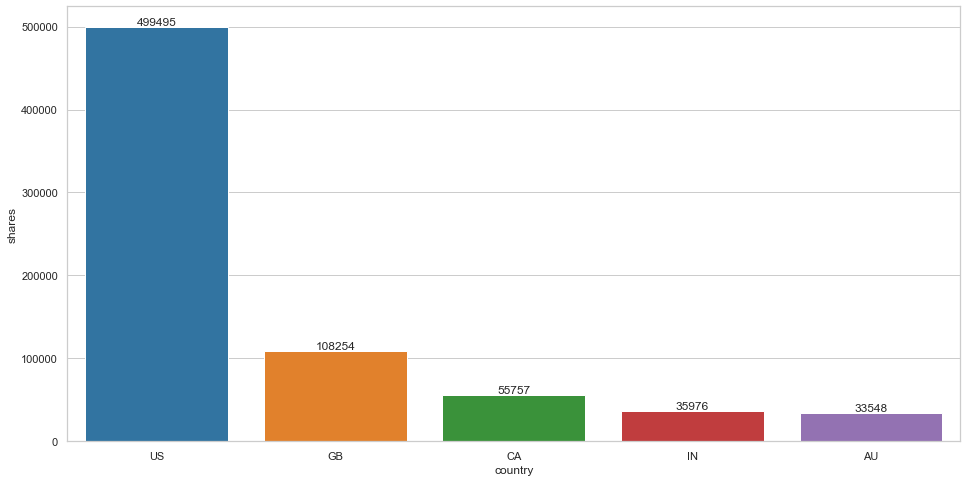

In [6]:
# Affichage des shares
plt.figure(figsize=(16,8))
chart = sns.barplot(data=shares[1:6], x='country', y='shares');
chart.bar_label(chart.containers[0]);

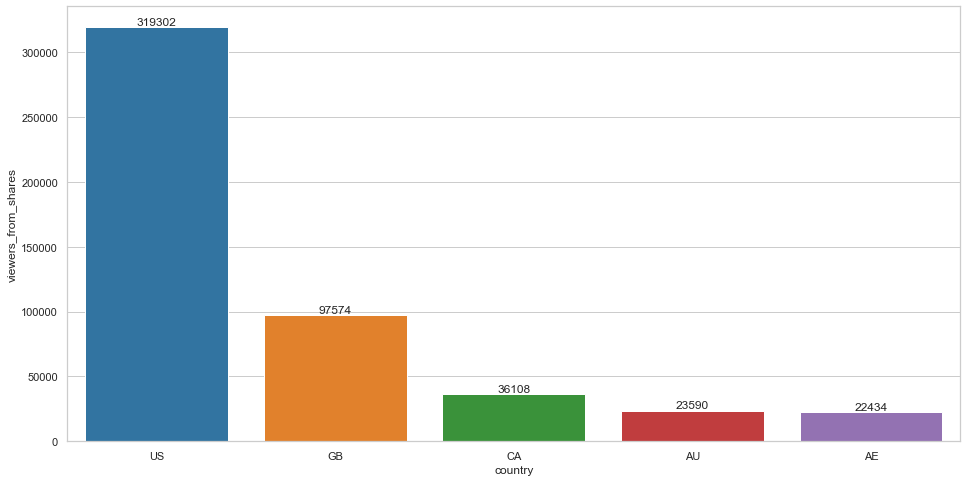

In [7]:
# Affichage des viewers_from_shares
plt.figure(figsize=(16,8))
chart = sns.barplot(data=viewers_from_shares[1:6], x='country', y='viewers_from_shares')
chart.bar_label(chart.containers[0]);

**Observation(s)** : On observe que le top 5 des pays qui partagent le plus mais aussi qui regardent le plus de partage est dans l'ordre :

1. US : États-Unis
2. GB : Royaume-Unis
3. CA : Canada
4. AU : Australie
5. AE : Émirats arabes unis

Il est donc plus judicieux que la langue de la nouvelle chaine soit l'anglais en se basant uniquement sur les partages de contenue. Toutefois, il serait intéressant d'analyser plus précisément le potentielle de vue pour le pays AE.